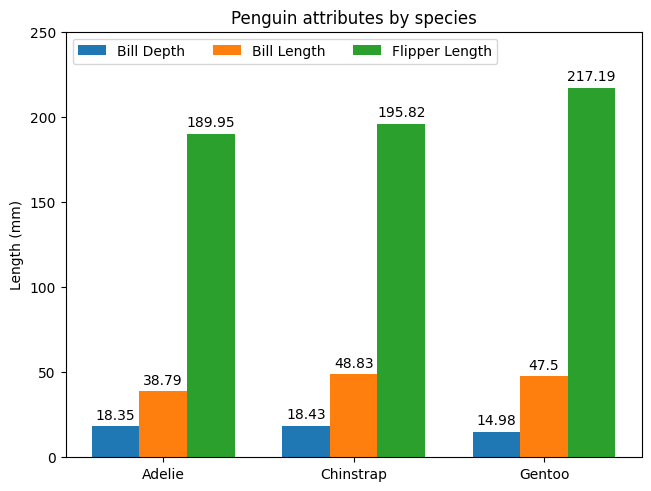

In [1]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

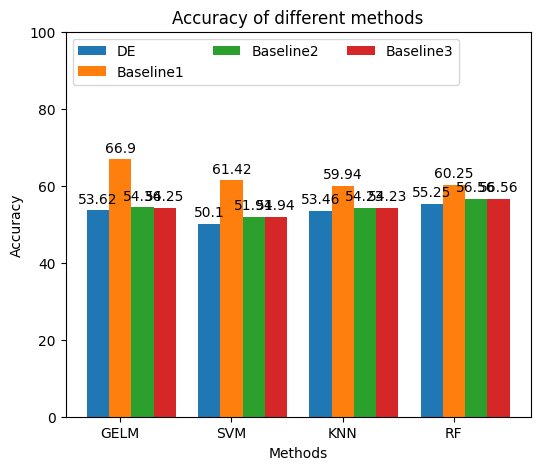

In [2]:
import matplotlib.pyplot as plt
import numpy as np

classif = ("GELM", "SVM", "KNN", "RF")
acc_means = {
    'DE': (0.536237477, 0.501022043, 0.534627613, 0.552532861),
    'Baseline1': (0.669045094, 0.614223529, 0.599396558, 0.602450296),
    'Baseline2': (0.543551995, 0.519403694, 0.542253561, 0.56560634),
    'Baseline3': (0.542490746, 0.519401368, 0.542253561, 0.56560634),
}

acc_std = {
    'DE': (0.103743968, 0.117041763, 0.117986545, 0.112183784),
    'Baseline1': (0.11699734, 0.120366456, 0.108461, 0.116403681),
    'Baseline2': (0.106851107, 0.119129047, 0.111943659, 0.112224149),
}

for key, values in acc_means.items():
    acc_means[key] = tuple(round(value * 100, 2) for value in values)

for key, values in acc_std.items():
    acc_std[key] = tuple(round(value * 100, 2) for value in values)

x = np.arange(len(classif))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(6, 5))


for attribute, measurement in acc_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
                   # yerr=acc_std[attribute], # Add error bars
                   # capsize=5) # Add cap size for the error bars
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Methods')
ax.set_title('Accuracy of different methods')
ax.set_xticks(x + width)
ax.set_xticklabels(classif)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.savefig('em10.pdf', format='pdf', bbox_inches='tight')

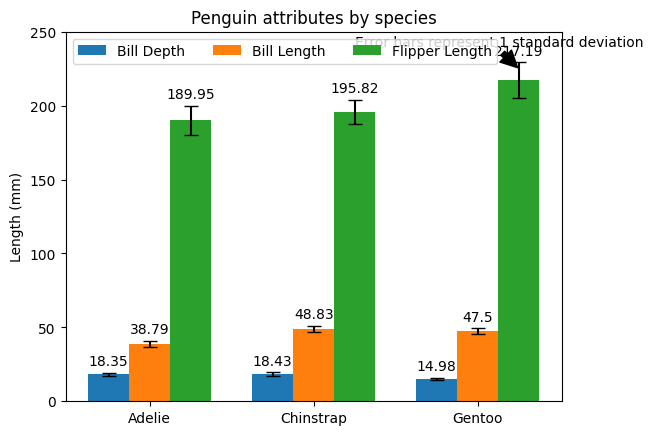

In [5]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

# Assume you have a dictionary with the standard deviations
penguin_std = {
    'Bill Depth': (1.0, 1.2, 0.8),
    'Bill Length': (2.0, 2.1, 1.9),
    'Flipper Length': (10.0, 8.0, 12.0),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, 
                   yerr=penguin_std[attribute], # Add error bars
                   capsize=5) # Add cap size for the error bars
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width)
ax.set_xticklabels(species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

# Add annotation for the error bars
ax.annotate('Error bars represent 1 standard deviation', 
            xy=(2.5, 225), # This is the point to label
            xytext=(1.5, 240), # This is the point to place the text
            arrowprops=dict(facecolor='black', shrink=0.05)) # This draws an arrow from the text to the point

plt.show()

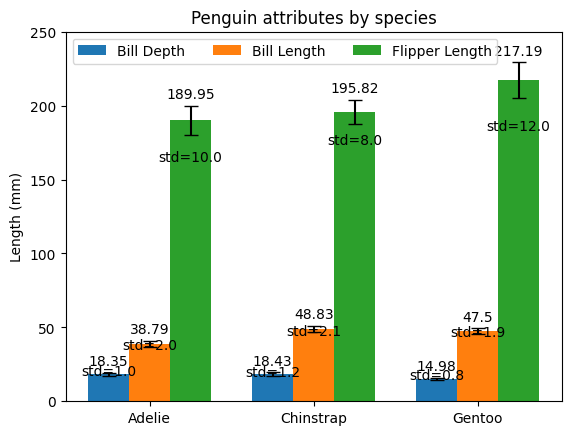

In [14]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

# Assume you have a dictionary with the standard deviations
penguin_std = {
    'Bill Depth': (1.0, 1.2, 0.8),
    'Bill Length': (2.0, 2.1, 1.9),
    'Flipper Length': (10.0, 8.0, 12.0),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    stds = penguin_std[attribute]
    rects = ax.bar(x + offset, measurement, width, label=attribute, 
                   yerr=stds, # Add error bars
                   capsize=5) # Add cap size for the error bars
    ax.bar_label(rects, padding=3)
    # Add text for the standard deviations
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height - 3*stds[i],
                f'std={stds[i]}', ha='center', va='bottom')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width)
ax.set_xticklabels(species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

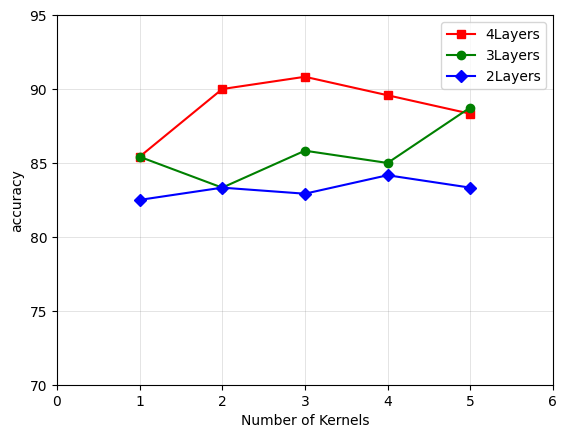

In [68]:
import matplotlib.pyplot as plt
import numpy as np
#折线图
x = np.arange(1, 6, 1)#点的横坐标
k1 = [85.42, 90.0, 90.83, 89.58, 88.33]#线1的纵坐标
k2 = [85.42, 83.33, 85.83, 85.00, 88.75 ]#线2的纵坐标
k3 = [82.50, 83.33, 82.92, 84.17, 83.33]
plt.plot(x,k1,'s-',color = 'r',label="4Layers")#s-:方形
plt.plot(x,k2,'o-',color = 'g',label="3Layers")#o-:圆形
plt.plot(x,k3,'D-',color = 'b',label="2Layers")#o-:圆形
plt.xlabel("Number of Kernels")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.xlim(0,6)
plt.ylim(70,95)
plt.legend(loc = "best")#图例
plt.grid(True, which='both', color='gray', linewidth=0.5, alpha=0.3)
plt.savefig('compareHyperP.pdf', format='pdf', bbox_inches='tight')
plt.show()


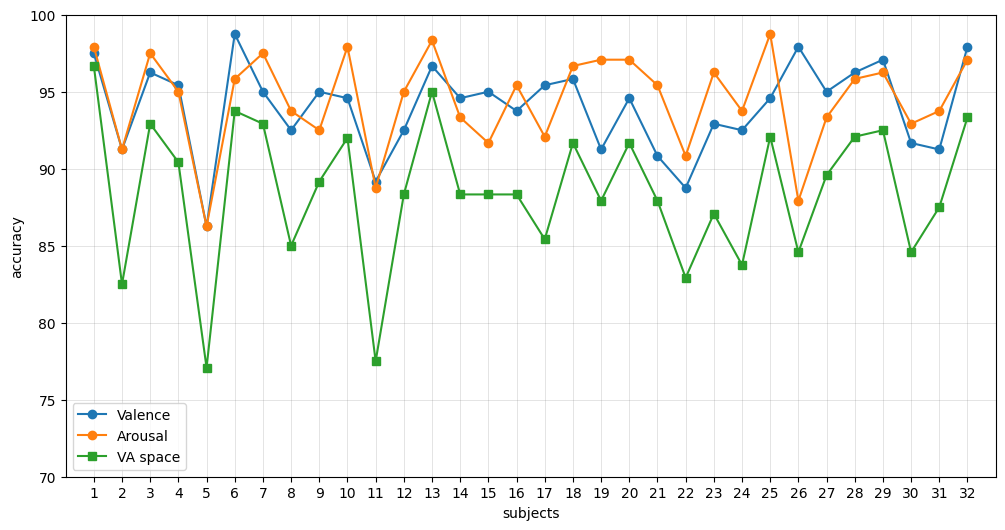

In [57]:
x = np.arange(1, 33, 1)#subjects
fourclasses = np.array([0.9667, 0.825,0.9292,0.9042,0.7708,0.9375,0.9292,0.85,0.8917,0.920,0.775,0.8833,0.95,0.8833,0.8833,
           0.8833,0.8542,0.9167,0.8792,0.9167,0.8792,0.8292,0.8708,0.8375,0.9208,0.8458,0.8958,0.9208,0.925,
           0.8458,0.875,0.9333])*100
valence = np.array([0.975,0.9125,0.9625,0.9542,0.8625,0.9875,0.95,0.925,0.95,0.9458,0.8917,0.925,0.9667,0.9458,
                    0.95,0.9375,0.9542,0.9583,0.9125,0.9458,0.9083,0.8875,0.9292,0.925,0.9458,0.9792,0.95,
                    0.9625,0.9708,0.9167,0.9125,0.9792])*100

arousal = np.array([0.9792,0.9125,0.975,0.95,0.8625,0.9583,0.975,0.9375,0.925,0.9792,0.8875,0.95,0.9833,0.9333,
           0.9167,0.9542,0.9208,0.9667,0.9708,0.9708,0.9542,0.9083,0.9625,0.9375,0.9875,0.8792,0.9333,
           0.9583,0.9625,0.9292,0.9375,0.9708])*100

plt.figure(figsize=(12,6))
plt.plot(x,valence,'o-',label="Valence")#o-:圆形
plt.plot(x,arousal,'o-',label="Arousal")#o-:圆形
plt.plot(x,fourclasses,'s-',label="VA space")#s-:方形
plt.xticks(np.arange(1, 33, step=1))
plt.xlabel("subjects")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.xlim(0,33)
plt.ylim(70,100)
plt.legend(loc = "best")#图例
plt.grid(True, which='both', color='gray', linewidth=0.5, alpha=0.3)
plt.savefig('compareHyperP.pdf', format='pdf', bbox_inches='tight')
plt.show()

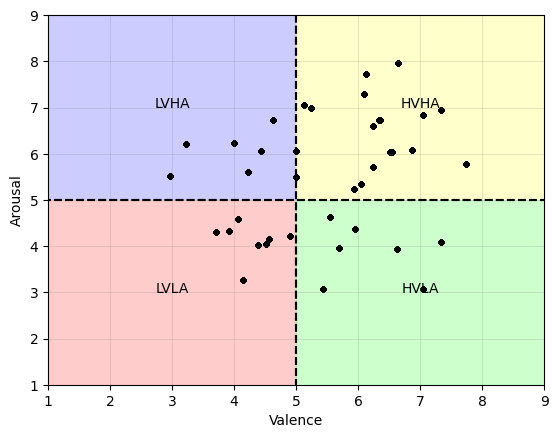

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

s = 's18'
label = np.load(f'./Topo_data/{s}-labels.npy')
# 创建一个空的图
fig, ax = plt.subplots()

# 定义区域的边界
x = [1, 5, 5, 9]
y = [1, 5, 5, 9]

# 添加标签区域
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']  # 分别代表标签 1, 2, 3, 4 的区域颜色
labels = ['LVLA', 'HVLA', 'LVHA', 'HVHA']

# 标签1的区域
ax.add_patch(patches.Rectangle((x[0], y[0]), x[1]-x[0], y[1]-y[0], facecolor=colors[0]))
ax.text((x[0]+x[1])/2, (y[0]+y[1])/2, labels[0], ha='center')

# 标签2的区域
ax.add_patch(patches.Rectangle((x[2], y[0]), x[3]-x[2], y[1]-y[0], facecolor=colors[1]))
ax.text((x[2]+x[3])/2, (y[0]+y[1])/2, labels[1], ha='center')

# 标签3的区域
ax.add_patch(patches.Rectangle((x[0], y[2]), x[1]-x[0], y[3]-y[2], facecolor=colors[2]))
ax.text((x[0]+x[1])/2, (y[2]+y[3])/2, labels[2], ha='center')

# 标签4的区域
ax.add_patch(patches.Rectangle((x[2], y[2]), x[3]-x[2], y[3]-y[2], facecolor=colors[3]))
ax.text((x[2]+x[3])/2, (y[2]+y[3])/2, labels[3], ha='center')

# 添加虚线
ax.plot([x[1], x[1]], [0, 10], 'k--')
ax.plot([x[2], x[2]], [0, 10], 'k--')
ax.plot([0, 10], [y[1], y[1]], 'k--')
ax.plot([0, 10], [y[2], y[2]], 'k--')

# 设置坐标轴的标签
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')

# 设置坐标轴的范围
ax.set_xlim(1, 9)
ax.set_ylim(1, 9)

ax.grid(True, which='both', color='gray', linewidth=0.5, alpha=0.3)
plt.xticks(np.arange(1, 10, step=1))
plt.yticks(np.arange(1, 10, step=1))
ax.scatter(label[:, 0], label[:, 1], c='black', s=10)
# 显示图
plt.savefig(f'../label_{s}.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [18]:
unique_values, indices = np.unique(label[:,0:2], return_index=True)

unique_values, indices

(array([1.        , 1.00999999, 1.76999998, 1.78999996, 1.85000002,
        1.86000001, 1.91999996, 1.97000003, 1.99000001, 2.00999999,
        2.02999997, 2.03999996, 2.05999994, 2.17000008, 2.18000007,
        2.23000002, 2.50999999, 2.71000004, 2.72000003, 2.75999999,
        2.77999997, 2.8499999 , 2.88000011, 2.91000009, 2.94000006,
        2.95000005, 2.96000004, 3.07999992, 3.0999999 , 3.1500001 ,
        3.30999994, 3.92000008, 3.96000004, 3.99000001, 4.05999994,
        4.09000015, 4.11999989, 4.88000011, 4.9000001 , 5.01000023,
        5.03000021, 5.03999996, 5.05000019, 5.13000011, 5.94999981,
        5.96999979, 6.        , 6.03999996, 6.05000019, 6.0999999 ,
        6.13000011, 6.13999987, 6.1500001 , 6.21999979, 6.67999983,
        6.96000004, 6.96999979, 7.        , 7.01000023, 7.05000019,
        7.07999992, 7.09000015, 7.23999977, 8.05000019, 8.10000038,
        8.17000008, 8.94999981]),
 array([ 80, 254,  46, 168,   6,  12,  38, 123, 325,  14,  30,  13,  47,
         

In [21]:
unique_rows, indices = np.unique(label[:,0:2], axis=0, return_index=True)
unique_rows, indices

(array([[1.        , 1.        ],
        [1.        , 1.97000003],
        [1.00999999, 6.1500001 ],
        [1.76999998, 2.05999994],
        [1.78999996, 1.85000002],
        [1.85000002, 4.88000011],
        [1.86000001, 2.03999996],
        [1.86000001, 2.77999997],
        [1.86000001, 2.91000009],
        [1.91999996, 2.96000004],
        [2.00999999, 2.23000002],
        [2.02999997, 2.88000011],
        [2.17000008, 2.18000007],
        [2.17000008, 6.96000004],
        [2.50999999, 2.95000005],
        [2.71000004, 5.13000011],
        [2.72000003, 2.75999999],
        [2.94000006, 1.99000001],
        [3.0999999 , 3.07999992],
        [3.1500001 , 3.99000001],
        [4.05999994, 3.30999994],
        [4.05999994, 5.03999996],
        [4.11999989, 4.88000011],
        [4.9000001 , 2.8499999 ],
        [5.01000023, 2.95000005],
        [5.03999996, 5.03999996],
        [5.96999979, 5.05000019],
        [6.        , 4.09000015],
        [6.05000019, 3.96000004],
        [6.099

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 创建一个空的图
fig, ax = plt.subplots()

# 定义区域的边界
x = [1, 4.8, 5.2, 9]
y = [1, 4.8, 5.2, 9]

# 添加标签区域
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']  # 分别代表标签 1, 2, 3, 4 的区域颜色
labels = ['1', '2', '3', '4']

# 标签1的区域
ax.add_patch(patches.Rectangle((x[0], y[0]), x[1]-x[0], y[1]-y[0], facecolor=colors[0]))
ax.text((x[0]+x[1])/2, (y[0]+y[1])/2, labels[0], ha='center')

# 标签2的区域
ax.add_patch(patches.Rectangle((x[2], y[0]), x[3]-x[2], y[1]-y[0], facecolor=colors[1]))
ax.text((x[2]+x[3])/2, (y[0]+y[1])/2, labels[1], ha='center')

# 标签3的区域
ax.add_patch(patches.Rectangle((x[0], y[2]), x[1]-x[0], y[3]-y[2], facecolor=colors[2]))
ax.text((x[0]+x[1])/2, (y[2]+y[3])/2, labels[2], ha='center')

# 标签4的区域
ax.add_patch(patches.Rectangle((x[2], y[2]), x[3]-x[2], y[3]-y[2], facecolor=colors[3]))
ax.text((x[2]+x[3])/2, (y[2]+y[3])/2, labels[3], ha='center')

# 添加虚线
ax.plot([x[1], x[1]], [0, 10], 'k--')
ax.plot([x[2], x[2]], [0, 10], 'k--')
ax.plot([0, 10], [y[1], y[1]], 'k--')
ax.plot([0, 10], [y[2], y[2]], 'k--')

# 设置坐标轴的标签
ax.set_xlabel('First Value')
ax.set_ylabel('Second Value')

# 设置坐标轴的范围
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# 添加网格
ax.grid(True, which='both', color='gray', linewidth=0.5)
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 11, step=1))

# 显示图
plt.show()